<a href="https://colab.research.google.com/github/dharsh70/Brain-Tumor-Detection/blob/main/Lenet_mini_project(old).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cached-prop

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
# avoid oom errors by setting memory conception growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

remove dodgy images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir='/content/drive/MyDrive/braintumor'

In [ ]:
os.listdir(os.path.join(data_dir,'no'))

['11 no.jpg',
 '1 no.jpeg',
 '10 no.jpg',
 '37 no.jpg',
 '25 no.jpg',
 '4 no.jpg',
 '46 no.jpg',
 '12 no.jpg',
 '26 no.jpg',
 '30 no.jpg',
 '41 no.jpg',
 '19 no.jpg',
 '13 no.jpg',
 '40 no.jpg',
 '8 no.jpg',
 '35 no.jpg',
 'N21.jpg',
 '3 no.jpg',
 'N20.JPG',
 '17 no.jpg',
 '6 no.jpg',
 '9 no.jpg',
 '34 no.jpg',
 '32 no.jpg',
 '5 no.jpg',
 'N15.jpg',
 '18 no.jpg',
 '50 no.jpg',
 'N2.JPG',
 '20 no.jpg',
 '39 no.jpg',
 'N19.JPG',
 '24 no.jpg',
 '31 no.jpg',
 'N11.jpg',
 '44no.jpg',
 '47 no.jpg',
 'N1.JPG',
 '45 no.jpg',
 '23 no.jpg',
 '22 no.jpg',
 '43 no.jpg',
 '33 no.jpg',
 '27 no.jpg',
 'N17.jpg',
 '7 no.jpg',
 '36 no.jpg',
 'N22.JPG',
 '38 no.jpg',
 '29 no.jpg',
 '48 no.jpeg',
 '21 no.jpg',
 '2 no.jpeg',
 '49 no.jpg',
 '15 no.jpg',
 '14 no.jpg',
 '28 no.jpg',
 '42 no.jpg',
 'N16.jpg',
 'No19.jpg',
 'no 8.jpg',
 'No21.jpg',
 'no 7.jpeg',
 'no 97.jpg',
 'no 89.jpg',
 'no.jpg',
 'no 9.png',
 'no 92.jpg',
 'no 99.jpg',
 'N26.JPG',
 'No16.jpg',
 'No20.jpg',
 'no 10.jpg',
 'N5.jpg',
 'no 90

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
c=1
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(c,end=" ")
    print(image_class)
    c=c+1

1 no
2 no
3 no
4 no
5 no
6 no
7 no
8 no
9 no
10 no
11 no
12 no
13 no
14 no
15 no
16 no
17 no
18 no
19 no
20 no
21 no
22 no
23 no
24 no
25 no
26 no
27 no
28 no
29 no
30 no
31 no
32 no
33 no
34 no
35 no
36 no
37 no
38 no
39 no
40 no
41 no
42 no
43 no
44 no
45 no
46 no
47 no
48 no
49 no
50 no
51 no
52 no
53 no
54 no
55 no
56 no
57 no
58 no
59 no
60 no
61 no
62 no
63 no
64 no
65 no
66 no
67 no
68 no
69 no
70 no
71 no
72 no
73 no
74 no
75 no
76 no
77 no
78 no
79 no
80 no
81 no
82 no
83 no
84 no
85 no
86 no
87 no
88 no
89 no
90 no
91 no
92 no
93 no
94 no
95 no
96 no
97 no
98 no
99 no
100 no
101 no
102 no
103 no
104 no
105 no
106 no
107 no
108 no
109 no
110 no
111 no
112 no
113 no
114 no
115 no
116 no
117 no
118 no
119 no
120 no
121 no
122 no
123 no
124 no
125 no
126 no
127 no
128 no
129 no
130 no
131 no
132 no
133 no
134 no
135 no
136 no
137 no
138 no
139 no
140 no
141 no
142 no
143 no
144 no
145 no
146 no
147 no
148 no
149 no
150 no
151 no
152 no
153 no
154 no
155 no
156 no
157 no
158 no
15

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

no
yes


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

load data

In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1547 files belonging to 2 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch=data_iterator.next()

In [ ]:
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

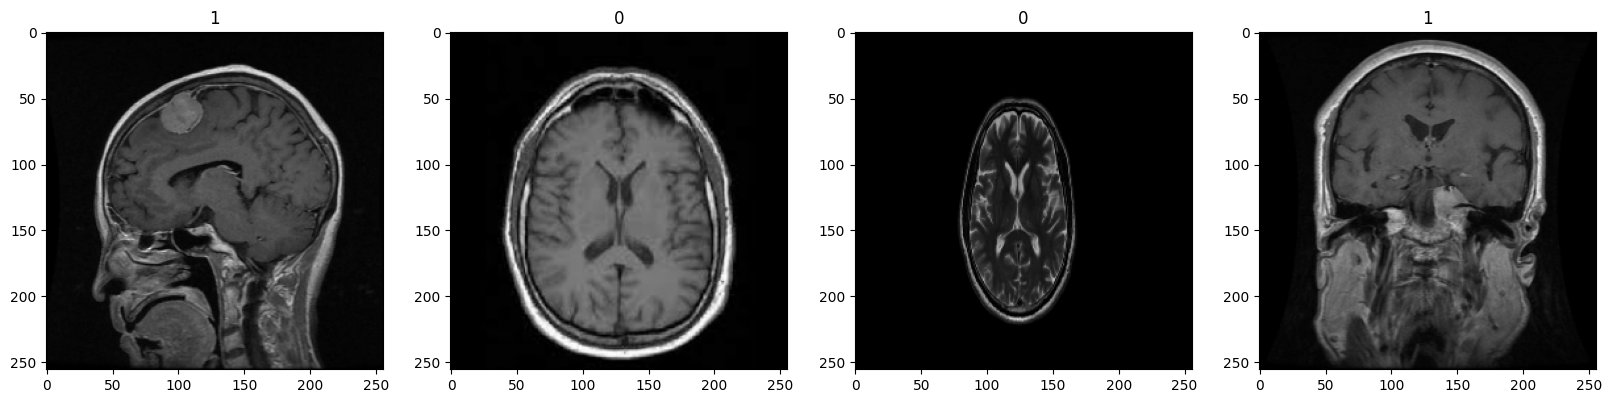

In [ ]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled=batch[0]/255

In [ ]:
scaled.min()

0.0

preprocessing

In [ ]:
data=data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

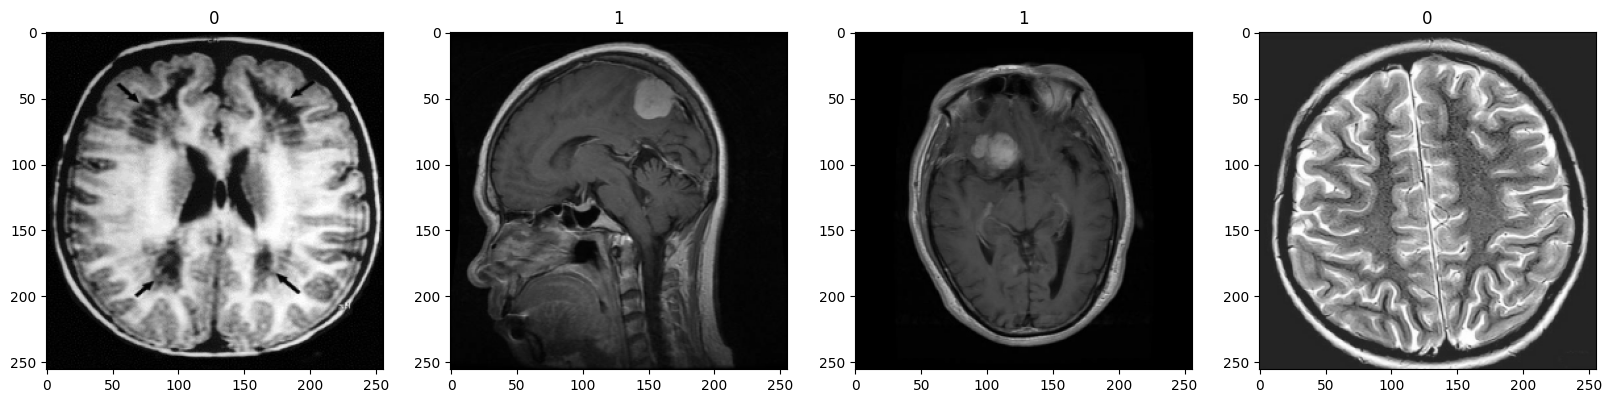

In [ ]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

49

In [ ]:
train_size = int(len(data)*.7)
val_size=int(len(data)*.1)+2
test_size=int(len(data)*.2)
print(test_size)

9


In [ ]:
train_size+val_size+test_size

49

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (5,5), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), 1, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(120, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(84, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 120)               1

Train Model

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train, epochs=14, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/14
34/34 [==============================] - 137s 4s/step - loss: 0.8836 - accuracy: 0.6939 - val_loss: 0.5423 - val_accuracy: 0.7292
Epoch 2/14
34/34 [==============================] - 150s 4s/step - loss: 0.4912 - accuracy: 0.6985 - val_loss: 0.3480 - val_accuracy: 0.7240
Epoch 3/14
34/34 [==============================] - 142s 4s/step - loss: 0.3879 - accuracy: 0.6912 - val_loss: 0.3136 - val_accuracy: 0.6562
Epoch 4/14
34/34 [==============================] - 135s 4s/step - loss: 0.2827 - accuracy: 0.6994 - val_loss: 0.2891 - val_accuracy: 0.7135
Epoch 5/14
34/34 [==============================] - 136s 4s/step - loss: 0.2484 - accuracy: 0.6949 - val_loss: 0.2683 - val_accuracy: 0.6823
Epoch 6/14
34/34 [==============================] - 139s 4s/step - loss: 0.1937 - accuracy: 0.6939 - val_loss: 0.2768 - val_accuracy: 0.6823
Epoch 7/14
34/34 [==============================] - 136s 4s/step - loss: 0.1614 - accuracy: 0.6939 - val_loss: 0.2110 - val_accuracy: 0.6979
Epoch 8/14
34

Plot Performance

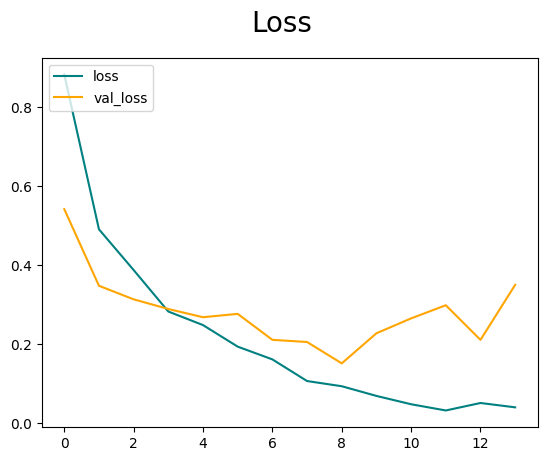

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

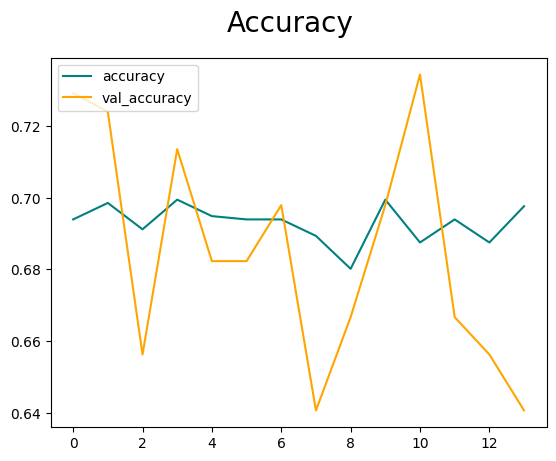

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

9

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:0.6666666865348816,Recall:1.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>>


Test

In [ ]:
import cv2

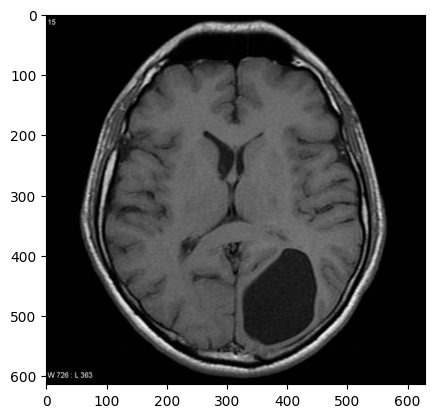

In [ ]:
img = cv2.imread('drive/MyDrive/braintumor/no/N11.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

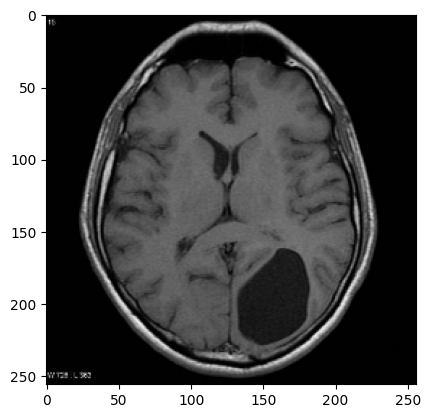

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5 :
  print(f'Predicted class is tumor')
else:
  print(f'Predicted class is no tumor')

Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','braintumorclassification.h5'))

In [ ]:
new_model = load_model(os.path.join('models','braintumorclassification.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 111ms/step


In [ ]:
if yhatnew > 0.5:
  print(f'Predicted class is tumor')
else:
  print(f'Predicted class is no tumor')

Visualize model

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.5 MB/s eta 0:00:00


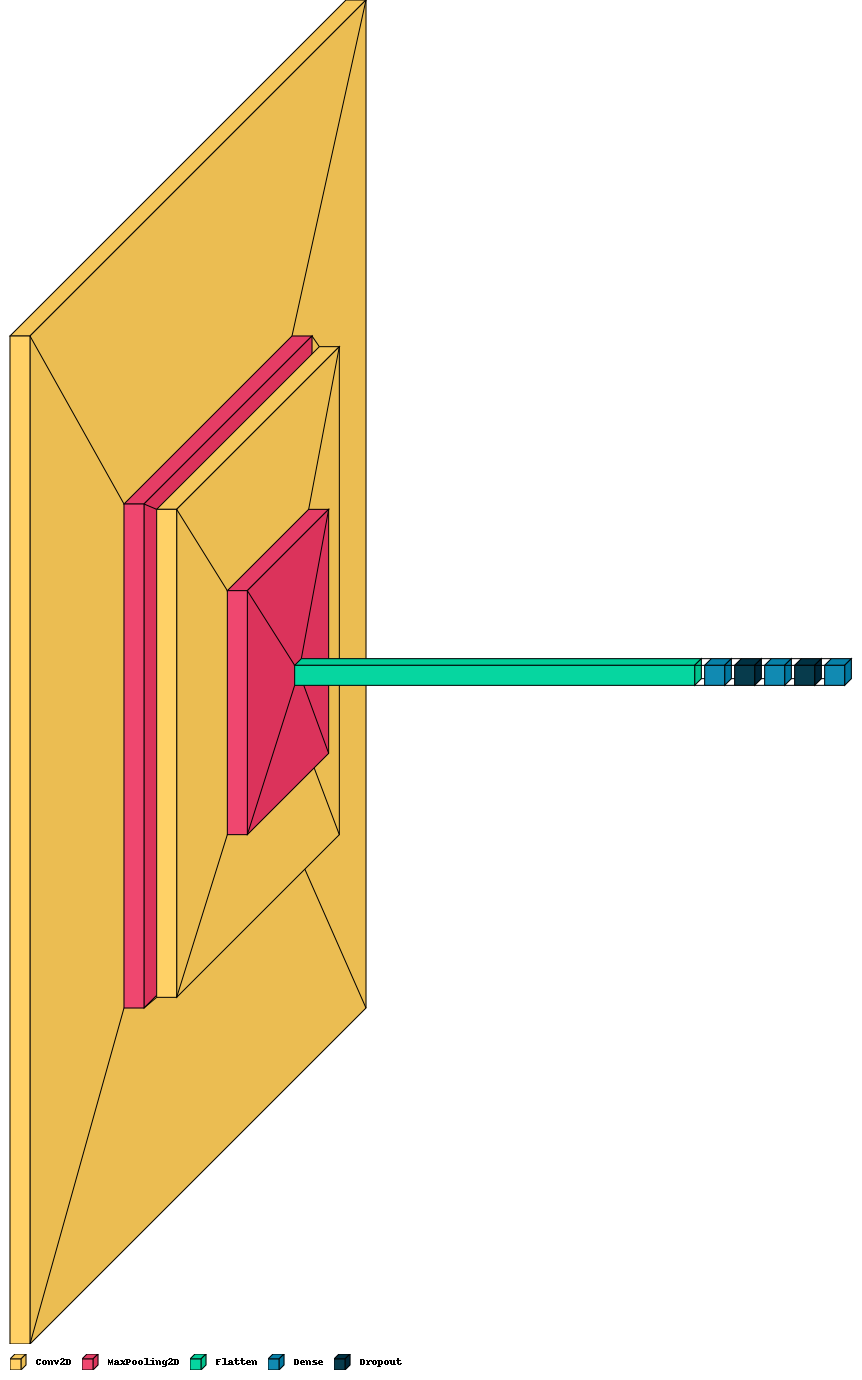

In [ ]:
from keras.models import Model
from keras.utils import plot_model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)